In [2]:
import pandas as pd	
from sklearn.metrics import roc_curve,auc 
import matplotlib.pyplot as plt

In [3]:
# 创建 DataFrame
data ={
    '真实标签':[1,1,0,1,1,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0],
    '预测分数':[0.9,0.8,0.7,0.6,0.55,0.54,0.53,0.52,0.51,0.505,0.4,0.39,0.38,0.37,0.36,0.35,0.34,0.33,0.30,0.1]
}
df=pd.DataFrame(data)
df.head(10)

,真实标签,预测分数
0,1,0.900
1,1,0.800
2,0,0.700
3,1,0.600
4,1,0.550
5,1,0.540
6,0,0.530
7,0,0.520
8,1,0.510
9,0,0.505


In [4]:
#计算所有的fpr、tpr坐标点、ROC去线下的面积AUC

In [5]:
#按照预测分数降序排序
df_sorted =df.sort_values(by='预测分数',ascending=False)
# 计算累积的真正例和假正例
cumulative_tp=df_sorted['真实标签'].cumsum()
cumulative_fp=(1-df_sorted['真实标签']).cumsum()
#计算总的真正例和假正例
total_tp=cumulative_tp.iloc[-1]
total_fp=cumulative_fp.iloc[-1]
#计算FPR 和TPR
fpr=cumulative_fp/total_fp
tpr=cumulative_tp/total_tp
#计算AUC 
roc_auc=auc(fpr,tpr)

In [6]:
#绘制ROC曲线

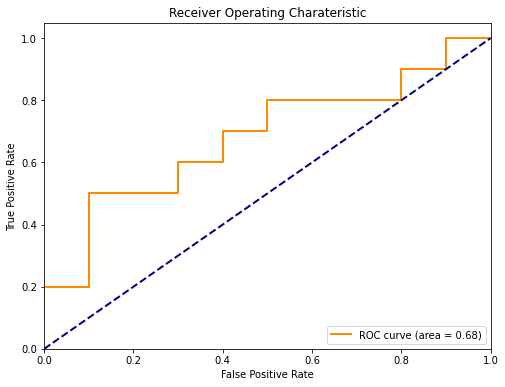

In [10]:
#绘制ROC曲线
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Charateristic')
plt.legend(loc="lower right")
plt.show()

每一折的得分:[1.         0.96666667 0.93333333 0.93333333 0.96666667]
平均得分:0.9600000000000002


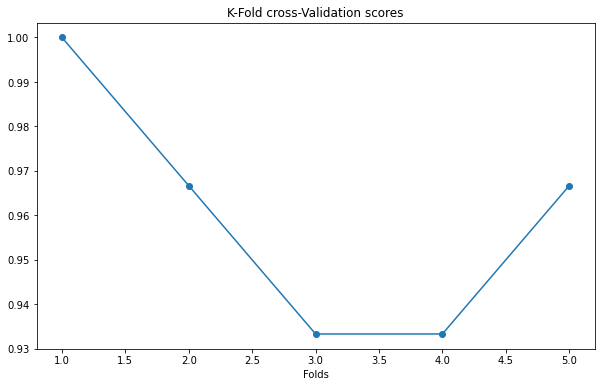

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier


# 加戟数据集
iris =load_iris()
X= iris.data
y= iris.target

# 初始化随机森林分类器
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
#初始化k折交叉验证对象，这里以5折为例
kf = KFold(n_splits=5,shuffle=True, random_state=42)
#进行K折交叉验证
scores =cross_val_score(classifier,X,y,cv=kf)
#打印每一折的得分以及平均得分
print(f"每一折的得分:{scores}")
print(f"平均得分:{scores.mean()}")

#可视化K折交叉验证的过程
import matplotlib.pyplot as plt

#记录每一折的索引和得分
folds =list(range(1,len(scores)+1))
plt.figure(figsize=(10,6))
plt.plot(folds,scores,marker='o')
plt.title('K-Fold cross-Validation scores')
plt.xlabel('Folds')
plt.show()

In [34]:
#导入必要的库
import numpy as np
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
#准备数据
#房屋面积(平方米)作为特征
x = np.array([[50],[70],[82],[101],[120]])# 价格(万元)作为目标变量
y= np.array([300,500,610,702,800])
# 创建线性回归模型实例
model = LinearRegression()
# 训练模型
model.fit(x, y)

# 获取模型的斜率(权重)和截距(偏置) 
slope = model.coef_
intercept = model.intercept_
print(f"斜率(权重):{slope[0]}") 
print(f"截距(偏置):{intercept}")

斜率(权重):6.997414262384324
截距(偏置):-9.581246597713744


预测的价格:
340.28946652150245
480.23775176918895
564.2067229178008
697.157593903103
830.1084648884051


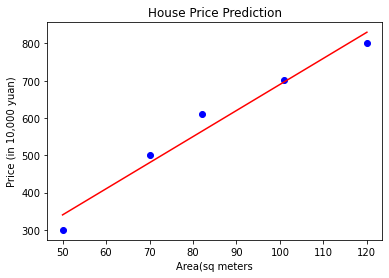

In [40]:
#使用模型进行预测
predictions=model.predict(x)
# 打印预测结果
print("预测的价格:")
for pred in predictions:
      print(pred)
# 可视化结果
plt.scatter(x,y,color='blue')#实际的点
plt.plot(x,predictions,color='red')#回归线
plt.title( 'House Price Prediction')
plt.xlabel('Area(sq meters')
plt.ylabel('Price (in 10,000 yuan)')
plt.show()